In [13]:
import torch



import sys
if '..' not in sys.path:
    sys.path.insert(0, '..')

from datasets.import_dataset import import_dataset
from trainer import Trainer
from utils.plotting import *

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload




/Users/juancervino/Dropbox/Github/PieClam/experiments/../trainer.py:161:::  

Using dataset specific configuration and not global 




/Users/juancervino/Dropbox/Github/PieClam/experiments/../trainer.py:335:::  

 2025-08-01 17:41:39 starting optimization of bigclam on sbm3x3 on device cpu

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 2,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 0.01,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-05,
        "n_iter": 10000,
        "early_stop": 0
    }
}
Fitting vanilla model...


/Users/juancervino/Dropbox/Github/PieClam/experiments/../clamiter.py:365:::  
staring fit_feats for 10000 iterations


/Users/juancervino/Dropbox/Github/PieClam/experiments/../clamiter.py:393:::  
fit wrapper fit_feats, plotting state at iter 9999


/Users/juancervino/Dropbox/Github/PieClam/experiments/../clamiter.py:393:::  
fit wrap

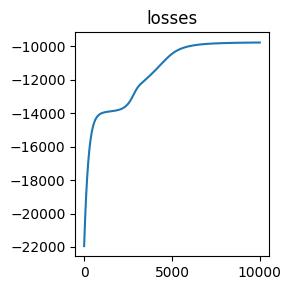

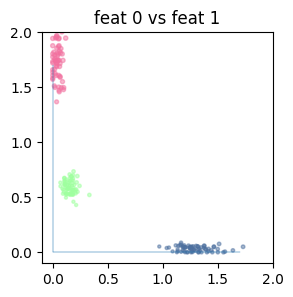

TEST accuracy.
Latest:
losses: -9768.369140625 
Best:
losses: -9768.369140625 at iteration 9999


/Users/juancervino/Dropbox/Github/PieClam/experiments/../trainer.py:444:::  



FINISHED train 
 last accuracies:
test
key='losses': -9768.369140625




/Users/juancervino/Dropbox/Github/PieClam/experiments/../trainer.py:460:::  

train_model_on_params on bigclam sbm3x3 
took 14.144369125366211 seconds


In [14]:
'''Experiment: bigclam finds bipartite structures as nested communities'''

data_sbm3x3 = import_dataset('sbm3x3')

config_triplets = [
    ['clamiter_init', 'dim_feat', 2],
    ['feat_opt', 'n_iter', 10000]
]

trainer_bigclam_sbm3x3 = Trainer(
    dataset=data_sbm3x3, 
    model_name='bigclam',
    config_triplets_to_change=config_triplets,
    device=device)

_ = trainer_bigclam_sbm3x3.train()

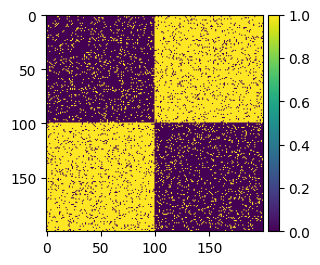

In [15]:
data_bipart = import_dataset('bipartite')
plot_sparse_adj(edge_index=data_bipart.edge_index)



/Users/juancervino/Dropbox/Github/PieClam/experiments/../trainer.py:161:::  

Using dataset specific configuration and not global 




/Users/juancervino/Dropbox/Github/PieClam/experiments/../trainer.py:335:::  

 2025-08-01 17:42:18 starting optimization of bigclam on bipartite on device cpu

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 2,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-05,
        "n_iter": 7000,
        "early_stop": 0
    }
}
Fitting vanilla model...


/Users/juancervino/Dropbox/Github/PieClam/experiments/../clamiter.py:365:::  
staring fit_feats for 7000 iterations


/Users/juancervino/Dropbox/Github/PieClam/experiments/../trainer.py:444:::  



FINISHED train 
 last accuracies:
test
key='losses': -13748.689453125




/Users/juancervino/Dropbox/Github/PieClam/experiments/../trainer.

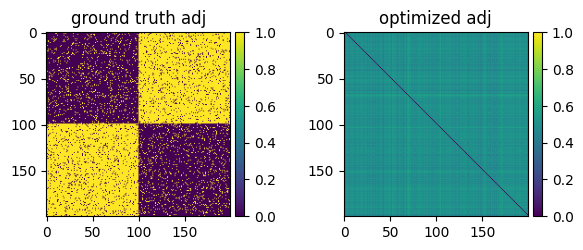

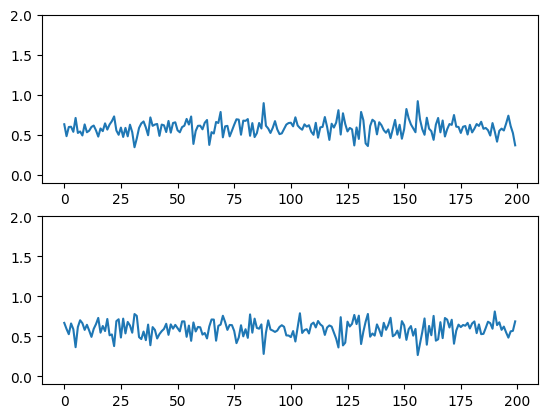

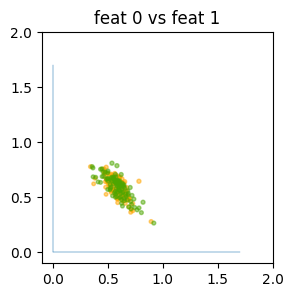

In [17]:

config_triplets=[
# ['feat_opt', 'lr', 0.001],
# ['clamiter_init', 'l1_reg', 0.05],
# ['feat_opt', 'n_iter', 50000]

]

trainer_bigclam_bipart = Trainer(dataset=data_bipart, 
                                 model_name='bigclam',
                                 device='cpu',
                                 config_triplets_to_change=config_triplets,
                                 use_global_config_base=False
                                )

_ = trainer_bigclam_bipart.train(plot_every=100000)

trainer_bigclam_bipart.plot_state(things_to_plot=['adj', '2dgraphs', 'feats'], node_size_factor=1)


In [11]:
# This cell should be run AFTER creating trainer_ieclam_bipart in the cell below
# trainer_ieclam_bipart.plot_state(things_to_plot=['adj', '2dgraphs', 'feats'], draw_edges=True)



/Users/juancervino/Dropbox/Github/PieClam/experiments/../trainer.py:161:::  

Using dataset specific configuration and not global 




/Users/juancervino/Dropbox/Github/PieClam/experiments/../trainer.py:335:::  

 2025-08-01 17:42:35 starting optimization of ieclam on bipartite on device cpu

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 2,
        "dim_attr": 64,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-05,
        "n_iter": 7000,
        "early_stop": 0
    }
}
Fitting vanilla model...


/Users/juancervino/Dropbox/Github/PieClam/experiments/../clamiter.py:365:::  
staring fit_feats for 7000 iterations


/Users/juancervino/Dropbox/Github/PieClam/experiments/../trainer.py:444:::  



FINISHED train 
 last accuracies:
test
key='losses': -6172.25732421875




/Users/juancervino/Dropbox/Github/PieClam/experiments/../trainer.p

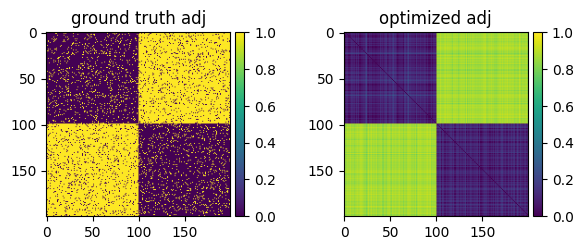

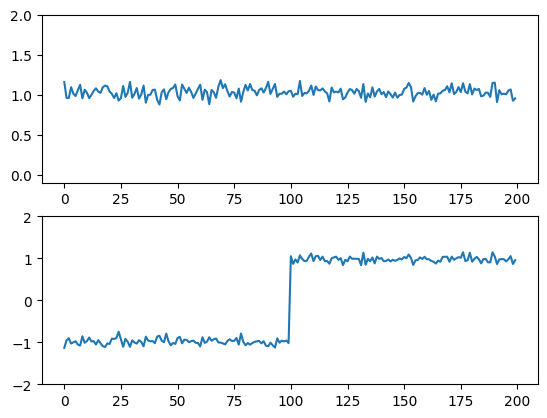

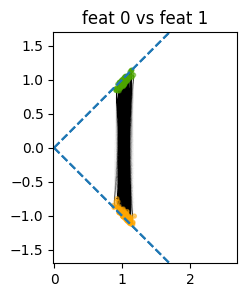



/Users/juancervino/Dropbox/Github/PieClam/experiments/../utils/plotting.py:27:::  
plotting 2 features


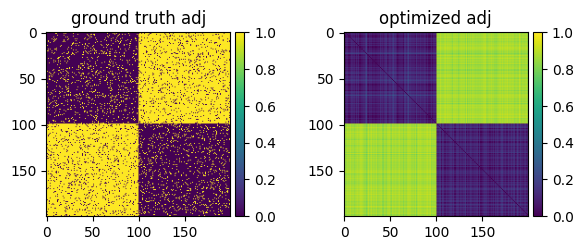

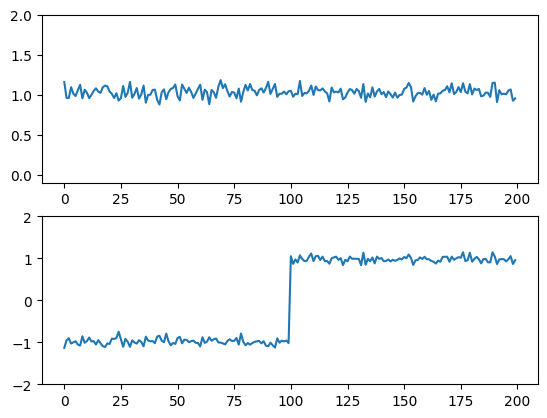

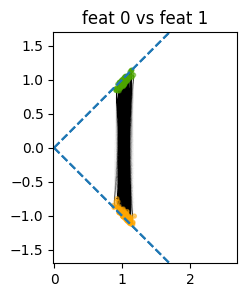

In [18]:
config_triplets=[
# ['clamiter_init', 'dim_feat', 2],

]

trainer_ieclam_bipart = Trainer(dataset=data_bipart, 
                                 model_name='ieclam',
                                 device='cpu',
                                 config_triplets_to_change=config_triplets,
                                 use_global_config_base=False
                                )

_ = trainer_ieclam_bipart.train(plot_every=100000)
trainer_ieclam_bipart.plot_state(things_to_plot=['adj', '2dgraphs', 'feats'], draw_edges=True)

# Now you can also call it separately if needed:
trainer_ieclam_bipart.plot_state(things_to_plot=['adj', '2dgraphs', 'feats'], draw_edges=True)